In [65]:
import cv2

import matplotlib.pyplot as plt
import numpy as np
import scipy.io

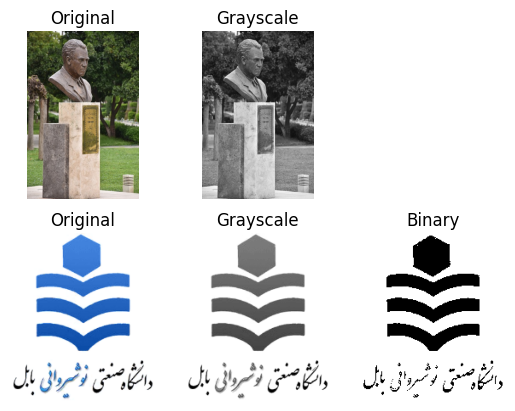

In [66]:
noshirvani_img = cv2.imread('Nsvn 00.jpg')
noshirvani_imgRGB = cv2.cvtColor(noshirvani_img, cv2.COLOR_BGR2RGB)
noshirvani_gray = cv2.cvtColor(noshirvani_img, cv2.COLOR_BGR2GRAY)

logo_img = cv2.imread('LOGO.png')
logo_imgRGB = cv2.cvtColor(logo_img, cv2.COLOR_BGR2RGB)
logo_gray = cv2.cvtColor(logo_img, cv2.COLOR_BGR2GRAY)

mat_data = scipy.io.loadmat('Logo.mat')
binary_image = mat_data['imbw']
logo_thresh = binary_image.astype('uint8')

for i, (title, image) in enumerate([("Original", noshirvani_imgRGB), ("Grayscale", noshirvani_gray)]):
    plt.subplot(2, 3, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')

for i, (title, image) in enumerate([("Original", logo_imgRGB), ("Grayscale", logo_gray), ("Binary", logo_thresh)]):
    plt.subplot(2, 3, (i + 3) + 1)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.show()

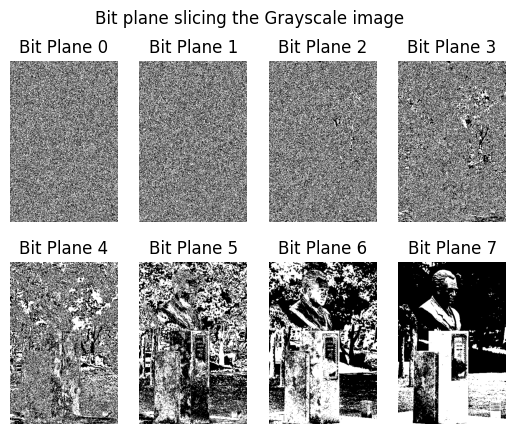

In [67]:
# Create an array to store the bit-plane images
bit_planes = [np.zeros(noshirvani_gray.shape, dtype=np.uint8) for _ in range(8)]

# Perform bit-plane slicing
for i in range(8):
    bit_planes[i] = (noshirvani_gray >> i) & 1

for i in range(8):
    plt.subplot(2, 4, i + 1)  # 2 rows, 4 columns, and i+1 is the subplot index
    plt.imshow(bit_planes[i] * 255, cmap='gray')
    plt.title(f'Bit Plane {i}')
    plt.axis('off')
plt.suptitle("Bit plane slicing the Grayscale image")
plt.show()

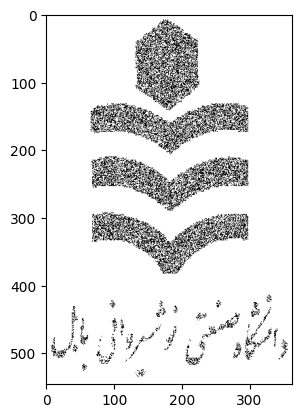

In [68]:
target_image = bit_planes[7]
logo_thresh = cv2.resize(logo_thresh, (target_image.shape[1], target_image.shape[0]))

stego_planes = [np.zeros(target_image.shape, dtype=np.uint8) for _ in range(8)]

bit_planes[0] = bit_planes[0] | logo_thresh

plt.imshow(bit_planes[0], cmap='gray')
plt.show()

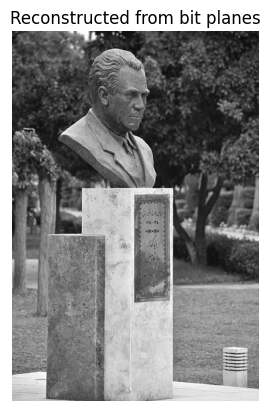

In [69]:
reconstructed_image = np.zeros(stego_planes[7].shape, dtype=np.uint8)

for i in range(8):
    reconstructed_image = reconstructed_image | (bit_planes[i] << i)

plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed from bit planes')
plt.axis('off')
plt.show()